In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
#Matriz de datos experimentales
M=np.zeros((11,3))
M[:,0]=np.arange(0,1.1,0.1) #x1exp
M[:,1]=1-M[:,0] #x2exp
M[:,2]=[28.10, 34.40, 36.70, 36.90, 36.80, 36.70, 36.50, 35.40, 32.90, 27.70, 17.50] #Pexp mmHg
M


array([[ 0. ,  1. , 28.1],
       [ 0.1,  0.9, 34.4],
       [ 0.2,  0.8, 36.7],
       [ 0.3,  0.7, 36.9],
       [ 0.4,  0.6, 36.8],
       [ 0.5,  0.5, 36.7],
       [ 0.6,  0.4, 36.5],
       [ 0.7,  0.3, 35.4],
       [ 0.8,  0.2, 32.9],
       [ 0.9,  0.1, 27.7],
       [ 1. ,  0. , 17.5]])

$$
x_i \gamma_i p_i^{\text {sat }}=y_i p \quad(i=1,2)
$$

The van Laar model for a binary mixture is
$$
\ln \gamma_1=A_{12}\left[\frac{A_{21} x_2}{A_{12} x_1+A_{21} x_2}\right]^2
$$
and
$$
\ln \gamma_2=A_{21}\left[\frac{A_{12} x_1}{A_{12} x_1+A_{21} x_2}\right]^2
$$

$$
p=y_1 p+y_2 p
$$

$$
\log p^{\text {sat }}=a_1-\frac{a_2}{T+a_3}
$$

$$
p=x_1 \exp \left[A_{12}\left(\frac{A_{21} x_2}{A_{12} x_1+A_{21} x_2}\right)^2\right] p_i^{\text {sat }}+x_2 \exp \left[A_{21}\left(\frac{A_{12} x_1}{A_{12} x_1+A_{21} x_2}\right)^2\right] p_2^{\text {sat }}
$$

$$
f=\sum_{i=1}^n\left(p_j^{\text {calc }}-p_j^{\text {expt }}\right)^2
$$

In [2]:
#Definimos la función a optimizar
def OPT_Vanlaar(v_i):
    #Calculos que podemos realizar previamente
    T = 20 #°C
    Ps1 = 10**(8.07131-(1730.630/(T+233.426))) #Agua
    Ps2 = 10**(7.43155-(1554.679/(T+240.337))) #1,4 dioxane
    x1 = M[:,0] 
    x2 = M[:,1]
    Pexp = M[:,2]
    #Valores iniciales
    A12 = v_i[0] ; A21=v_i[1] 
    alpha = (A21*x2)/(A12*x1 + A21*x2)
    beta = (A12*x1)/(A12*x1 + A21*x2)
    Pcal = (x1*np.exp(A12*alpha**2)*Ps1) + (x2*np.exp(A21*beta**2)*Ps2)
    n=len(M[:,0])
    #Vector para almacenar la diferencia **2
    Sres=np.zeros(n)
    for i in list(range(0,n)):
        Sres[i]=(Pcal[i]-Pexp[i])**2  
    #Vamos a calcular la suma del error    
    f=np.sum(Sres)       
    return f


In [8]:
v_i=[1,1]
OPT=minimize(OPT_Vanlaar,v_i,method="Nelder-Mead")
print(OPT.x)

[1.95842734 1.6892038 ]


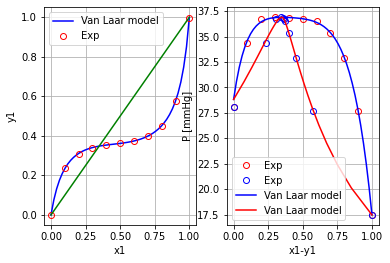

In [9]:
Param=OPT.x
def G_opti(Param):    
    #Datos experimentales
    x1exp=M[:,0] ; x2exp=M[:,1] ; Pexp=M[:,2]
    A12=Param[0] ; A21=Param[1]
    #Datos para realizar una predicción
    x1=np.linspace(0,1); x2=1-x1
    T = 20 #°C
    Ps1 = 10**(8.07131-(1730.630/(T+233.426))) #Agua
    Ps2 = 10**(7.43155-(1554.679/(T+240.337))) #1,4 dioxane
    alpha = (A21*x2)/(A12*x1 + A21*x2)
    beta = (A12*x1)/(A12*x1 + A21*x2)
    Pcal = (x1*np.exp(A12*alpha**2)*Ps1) + (x2*np.exp(A21*beta**2)*Ps2)
    gamma_1 = np.exp(A12*alpha**2)
    gamma_1exp = np.exp(A12*((A21*x2exp)/(A12*x1exp + A21*x2exp))**2)
    y1calc= (x1*gamma_1*Ps1)/Pcal
    y1exp= (x1exp*gamma_1exp*Ps1)/Pexp
    z=np.linspace(0,1,len(x1))
    #Grafico de composiciónes
    fig,axs=plt.subplots(1,2)
    axs[0].plot(x1,y1calc,"b-",label="Van Laar model")
    axs[0].plot(x1exp,y1exp,"o", ms = 6, mec = 'red', mfc = 'None',label="Exp")
    axs[0].plot(x1,z,"g-")
    axs[0].legend(loc="best")
    axs[0].set_xlabel("x1")
    axs[0].set_ylabel("y1")
    axs[0].grid(True)          
    axs[1].plot(x1exp,Pexp,"o", ms = 6, mec = 'red', mfc = 'None',label="Exp")
    axs[1].plot(y1exp,Pexp,"o", ms = 6, mec = 'blue', mfc = 'None',label="Exp")
    axs[1].plot(x1,Pcal,"b-",label="Van Laar model")
    axs[1].plot(y1calc,Pcal,"r-",label="Van Laar model")
    axs[1].legend(loc="best")
    axs[1].set_xlabel("x1-y1")
    axs[1].set_ylabel("P [mmHg]")
    axs[1].grid(True)      
    plt.show()     
    

G_opti(Param)    
